In [2]:
#import libraries and dependencies
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import requests

import time
from scipy.stats import linregress

In [2]:
#import datafile from CSV sample file and name as a variable 
df = pd.read_csv('../Water Project/Mer-Water-Lab-Data.csv')

In [3]:
#sort an example by date
d = '2015-01-08 22:44:09'
date=pd.to_datetime(d).date()
date

datetime.date(2015, 1, 8)

In [4]:
#look at Alameda and consolidate that county's data in one place. 
Alameda_table = df.loc[df["county_name"] == 'Alameda']
Alameda_dates = Alameda_table["sample_date"]
Alameda_table["converted_date"] = pd.to_datetime(Alameda_dates)

/var/folders/2p/49ybcsbj6nb1_gjhq7bl4j2m0000gn/T/ipykernel_22551/4045560223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alameda_table["converted_date"] = pd.to_datetime(Alameda_dates)


In [5]:
df.shape
#confirm number of rows and columns.

(17280, 18)

In [6]:
df.info()
#get range index by column type. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station_id          17280 non-null  int64  
 1   station_name        17280 non-null  object 
 2   full_station_name   17280 non-null  object 
 3   station_number      17280 non-null  object 
 4   station_type        17280 non-null  object 
 5   latitude            16847 non-null  float64
 6   longitude           16847 non-null  float64
 7   status              17280 non-null  object 
 8   county_name         17280 non-null  object 
 9   sample_code         17280 non-null  object 
 10  sample_date         17280 non-null  object 
 11  sample_depth        11162 non-null  float64
 12  sample_depth_units  17280 non-null  object 
 13  parameter           17280 non-null  object 
 14  result              17275 non-null  float64
 15  reporting_limit     17279 non-null  float64
 16  unit

In [7]:
df.columns
#show column names. 

Index(['station_id', 'station_name', 'full_station_name', 'station_number',
       'station_type', 'latitude', 'longitude', 'status', 'county_name',
       'sample_code', 'sample_date', 'sample_depth', 'sample_depth_units',
       'parameter', 'result', 'reporting_limit', 'units', 'method_name'],
      dtype='object')

In [8]:
df.head(5)
#show first 10 rows. 

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0003485,3/5/80 11:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
1,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0309048,4/22/86 13:35,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
2,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0309057,6/3/88 12:20,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
3,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0003490,7/7/80 14:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
4,13497,03S02E08G001M,03S02E08G001M,03S02E08G001M,Groundwater,37.6881,121.7767,Review Status Unknown,Alameda,WDIS_0309060,6/30/76 0:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury


In [9]:
df.tail(10)

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
17270,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D0621B0038,6/15/21 11:00,1.0,Meters,Dissolved Mercury,0.0,0.2,ug/L,EPA 200.8 (Hg Dissolved)
17271,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D0721B0046,7/20/21 11:00,1.0,Meters,Dissolved Mercury,0.0,0.2,ug/L,EPA 200.8 (Hg Dissolved)
17272,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D0821B0061,8/17/21 10:55,1.0,Meters,Dissolved Mercury,0.0,0.2,ug/L,EPA 200.8 (Hg Dissolved)
17273,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D0921B0068,9/14/21 10:45,1.0,Meters,Dissolved Mercury,0.0,0.2,ug/L,EPA 200.8 (Hg Dissolved)
17274,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1021B0072,10/19/21 10:50,1.0,Meters,Dissolved Mercury,0.0,0.2,ug/L,EPA 200.8 (Hg Dissolved)
17275,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1020B0054,10/20/20 10:30,1.0,Meters,Dissolved Mercury,0.0,0.2,ug/L,EPA 200.8 (Hg Dissolved)
17276,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1121B0078,11/16/21 11:45,1.0,Meters,Dissolved Mercury,0.0,0.2,ug/L,EPA 200.8 (Hg Dissolved)
17277,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1120B0059,11/17/20 11:30,1.0,Meters,Dissolved Mercury,0.0,0.2,ug/L,EPA 200.8 (Hg Dissolved)
17278,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1221B0082,12/14/21 12:15,1.0,Meters,Dissolved Mercury,0.0,0.2,ug/L,EPA 200.8 (Hg Dissolved)
17279,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1220B0066,12/15/20 11:45,1.0,Meters,Dissolved Mercury,0.0,0.2,ug/L,EPA 200.8 (Hg Dissolved)


In [10]:
df.describe()
#Get the mean of the entire data set for mercury levels. 

,station_id,latitude,longitude,sample_depth,result,reporting_limit
count,17280.000000,16847.000000,16847.000000,11162.000000,17275.000000,17279.000000
mean,11964.889063,37.146083,118.008836,9.086266,0.440497,0.071116
std,17500.858905,2.203956,24.323999,55.173400,8.133779,0.416791
min,1.000000,32.606200,-121.482000,0.000000,0.000000,0.000200
25%,385.000000,34.834000,118.711900,0.300000,0.000000,0.000200
50%,2418.000000,37.618300,121.148300,1.000000,0.000000,0.001000
75%,20092.500000,38.833200,121.796500,1.000000,0.000000,0.001000
max,47887.000000,41.997900,124.366400,1210.000000,400.000000,50.000000


In [11]:
df = df.rename(columns={' station_type':'county_name', 'parameter':'result'})

In [12]:
df.columns

Index(['station_id', 'station_name', 'full_station_name', 'station_number',
       'station_type', 'latitude', 'longitude', 'status', 'county_name',
       'sample_code', 'sample_date', 'sample_depth', 'sample_depth_units',
       'result', 'result', 'reporting_limit', 'units', 'method_name'],
      dtype='object')

In [13]:
import matplotlib.pyplot as plt

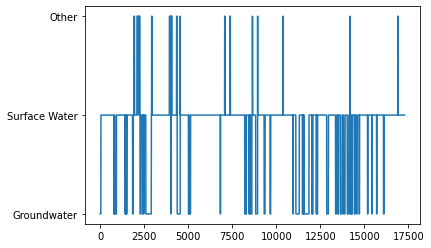

In [14]:
plt.plot(df['station_type'])

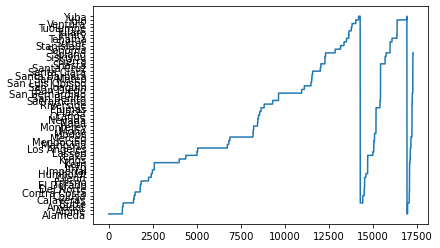

In [15]:
#plotting 'parameter' and 'result' executes errors. Why?
plt.plot(df['county_name'])

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('../Water Project/Mer-Water-Lab-Data.csv')

In [18]:
df.loc[df["county_name"] == "Alameda"]

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0003485,3/5/80 11:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
1,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0309048,4/22/86 13:35,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
2,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0309057,6/3/88 12:20,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
3,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0003490,7/7/80 14:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
4,13497,03S02E08G001M,03S02E08G001M,03S02E08G001M,Groundwater,37.6881,121.7767,Review Status Unknown,Alameda,WDIS_0309060,6/30/76 0:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16964,373,Del Valle Check,South Bay Aqueduct Del Valle Check 7,KB001638,Surface Water,37.6547,121.7419,Review Status Unknown,Alameda,D1020B0053,10/19/20 12:05,1.0,Meters,Dissolved Mercury,0.0,0.200,ug/L,EPA 200.8 (Hg Dissolved)
16965,373,Del Valle Check,South Bay Aqueduct Del Valle Check 7,KB001638,Surface Water,37.6547,121.7419,Review Status Unknown,Alameda,D1121B0077,11/15/21 13:20,1.0,Meters,Dissolved Mercury,0.0,0.200,ug/L,EPA 200.8 (Hg Dissolved)
16966,373,Del Valle Check,South Bay Aqueduct Del Valle Check 7,KB001638,Surface Water,37.6547,121.7419,Review Status Unknown,Alameda,D1120B0058,11/16/20 13:25,1.0,Meters,Dissolved Mercury,0.0,0.200,ug/L,EPA 200.8 (Hg Dissolved)
16967,373,Del Valle Check,South Bay Aqueduct Del Valle Check 7,KB001638,Surface Water,37.6547,121.7419,Review Status Unknown,Alameda,D1221B0081,12/13/21 12:15,1.0,Meters,Dissolved Mercury,0.0,0.200,ug/L,EPA 200.8 (Hg Dissolved)


In [19]:
df['county_name']

0        Alameda
1        Alameda
2        Alameda
3        Alameda
4        Alameda
          ...   
17275     Solano
17276     Solano
17277     Solano
17278     Solano
17279     Solano
Name: county_name, Length: 17280, dtype: object

In [20]:
df['county_name'].str.split(" ",expand= True)

,0,1,2
0,Alameda,None,None
1,Alameda,None,None
2,Alameda,None,None
3,Alameda,None,None
4,Alameda,None,None
...,...,...,...
17275,Solano,None,None
17276,Solano,None,None
17277,Solano,None,None
17278,Solano,None,None


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

county_df = pd.read_csv('../Water Project/Mer-Water-Lab-Data.csv')
print(county_df.shape)
county_df.info()


(17280, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station_id          17280 non-null  int64  
 1   station_name        17280 non-null  object 
 2   full_station_name   17280 non-null  object 
 3   station_number      17280 non-null  object 
 4   station_type        17280 non-null  object 
 5   latitude            16847 non-null  float64
 6   longitude           16847 non-null  float64
 7   status              17280 non-null  object 
 8   county_name         17280 non-null  object 
 9   sample_code         17280 non-null  object 
 10  sample_date         17280 non-null  object 
 11  sample_depth        11162 non-null  float64
 12  sample_depth_units  17280 non-null  object 
 13  parameter           17280 non-null  object 
 14  result              17275 non-null  float64
 15  reporting_limit     17279 non-null  float

In [22]:
county_df.groupby(['county_name']).mean()['result']
#I want to grab the top 5 counties
#I know I want to use grouby to consolidate all the counties by highest result of mercury levels. 
#the mean of results

#determine which are the top 5 results.
#sort by descending order to show highest to lowest.
#how do I grab the top 5 from the county_name series.
#graph each top 5 result

county_name
Alameda              0.000492
Alpine               0.000000
Amador               0.000000
Butte                0.000209
Calaveras            0.000000
Colusa               0.001810
Contra Costa         0.000000
Del Norte            0.000813
El Dorado            0.000000
Fresno               1.421801
Glenn                0.000303
Humboldt             0.001517
Imperial             0.000000
Inyo                 0.000000
Kern                 0.580652
Kings                0.000000
Lake                 0.115963
Lassen               0.000410
Los Angeles          1.457941
Mariposa             0.000000
Mendocino            0.052119
Merced               0.014982
Modoc                0.001946
Mono               125.925926
Monterey             0.046083
Napa                 0.000000
Nevada               0.000000
Orange               0.136986
Placer               0.000000
Plumas               0.011295
Riverside            0.068016
Sacramento           0.000381
San Benito           0.00000

In [23]:
county_df.county_name.sort_values()
#Alphabetize the series.

0        Alameda
536      Alameda
537      Alameda
538      Alameda
539      Alameda
          ...   
14200       Yuba
14199       Yuba
14198       Yuba
14209       Yuba
14276       Yuba
Name: county_name, Length: 17280, dtype: object

In [24]:
county_df['county_name'].sort_values(ascending=False)
#organize series in ascending order. 

14276       Yuba
16930       Yuba
14198       Yuba
14197       Yuba
14196       Yuba
          ...   
282      Alameda
281      Alameda
280      Alameda
279      Alameda
0        Alameda
Name: county_name, Length: 17280, dtype: object

In [25]:
county_df.sort_values(['county_name'],ascending=False).groupby('result').head(5)
#sort values of results by ascending order.

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
14276,1298,YUBA R NR MARYSVILLE,YUBA R NR MARYSVILLE,A0615000,Surface Water,39.1763,121.5247,Review Status Unknown,Yuba,WDIS_0870472,9/26/78 8:30,NaN,Feet,Total Mercury,0.00000,0.0010,ug/L,EPA 245.1(T)
16930,45866,Yuba R@MO,Yuba R A MO,A6101050,Surface Water,39.1284,121.5976,Review Status Unknown,Yuba,N1115B0726,11/10/15 11:35,0.15,Meters,Total Mercury,0.00090,0.5000,ug/L,EPA 1631 E (T)
14198,46604,YCWA PMW-7B,14N05E31L002M,14N05E31L002M,Groundwater,39.0174,121.4630,Review Status Unknown,Yuba,CHD1006B0194,10/20/06 11:05,0.00,Meters,Dissolved Mercury,0.00000,0.0002,ug/L,EPA 200.8 (Hg Dissolved)
14197,46603,YCWA PMW-7A,14N05E31L001M,14N05E31L001M,Groundwater,39.0174,121.4630,Review Status Unknown,Yuba,CHD1006B0193,10/20/06 10:20,0.00,Meters,Dissolved Mercury,0.00000,0.0002,ug/L,EPA 200.8 (Hg Dissolved)
14196,46544,YCWA-15,14N05E28A002M,14N05E28A002M,Groundwater,39.0463,121.4185,Review Status Unknown,Yuba,CHD0306B0081,3/30/06 13:25,0.00,Meters,Dissolved Mercury,0.00000,0.0002,ug/L,EPA 200.8 (Hg Dissolved)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14423,678,SCR-01,SLY C RES NR S END OF DM,A5R93681057,Surface Water,39.6138,121.0969,Review Status Unknown,Butte,NA0906B1203,9/26/06 9:30,70.00,Meters,Total Mercury,0.00076,0.2000,ug/L,EPA 1631 E (T)
14420,678,SCR-01,SLY C RES NR S END OF DM,A5R93681057,Surface Water,39.6138,121.0969,Review Status Unknown,Butte,NA0706B0978,7/25/06 8:45,0.50,Meters,Total Mercury,0.00035,0.2000,ug/L,EPA 1631 E (T)
14418,45848,SF FR AB Pond Res,Feather R SF AB Ponderosa RES,A5611050,Surface Water,39.5443,121.2690,Review Status Unknown,Butte,NB1106B5071,12/4/06 11:15,0.15,Meters,Total Mercury,0.00057,0.2000,ug/L,EPA 1631 E (T)
14414,1908,FEATHER R MF NR MERR,FEATHER R MF NR MERRIMAC,A5510000,Surface Water,39.7082,121.2719,Review Status Unknown,Butte,NB1106B5069,11/28/06 12:15,0.15,Meters,Total Mercury,0.00066,0.2000,ug/L,EPA 1631 E (T)


In [26]:
county_df.groupby(['county_name']).mean()['result'].head(5)
#sort series by first 5.

county_name
Alameda      0.000492
Alpine       0.000000
Amador       0.000000
Butte        0.000209
Calaveras    0.000000
Name: result, dtype: float64

In [27]:
county_df.groupby(['county_name']).mean()['result'].sort_values(ascending=False)
#sort by top highest results

county_name
Mono               125.925926
Los Angeles          1.457941
Fresno               1.421801
Kern                 0.580652
Orange               0.136986
Lake                 0.115963
Riverside            0.068016
Mendocino            0.052119
Monterey             0.046083
San Bernardino       0.045299
Merced               0.014982
Plumas               0.011295
Yolo                 0.009198
San Joaquin          0.007427
Modoc                0.001946
Colusa               0.001810
Sutter               0.001755
Tehama               0.001739
Humboldt             0.001517
Solano               0.001035
Yuba                 0.000852
Del Norte            0.000813
Shasta               0.000643
Alameda              0.000492
Siskiyou             0.000484
Lassen               0.000410
Sacramento           0.000381
Sierra               0.000340
Glenn                0.000303
Trinity              0.000279
Butte                0.000209
Ventura              0.000000
Tuolumne             0.00000

In [28]:
county_df.groupby(['county_name']).mean()['result'].sort_values(ascending=False).head(5)
#sort by top 5 highest results

county_name
Mono           125.925926
Los Angeles      1.457941
Fresno           1.421801
Kern             0.580652
Orange           0.136986
Name: result, dtype: float64

In [106]:
#I am adding county names, results of total amounts of mercury detected, as well as the current population of each county. 
county=['San Diego', 'Los Angeles', 'Sacramento', 'Alameda']
mercury=[0.0,1.45,1.42,0.0,0.00]

ValueError: shape mismatch: objects cannot be broadcast to a single shape

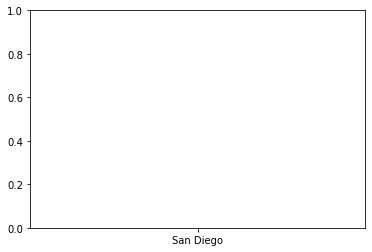

In [107]:
plt.bar(county, mercury)
plt.title('Mercury Levels Overtime')
plt.xlabel('county')
plt.ylabel('mercury')
plt.show()

In [101]:
ypos = np.arange(len(county))
ypos

array([0, 1, 2, 3, 4])

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).

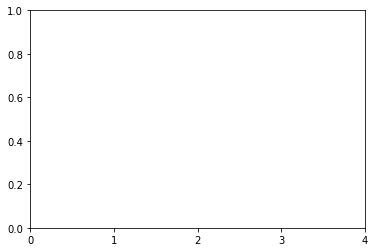

In [104]:
#I want to visualize in a bar graph the mean of mercury levels over time. 
#I want to include the population of each county involved to compare and contrast to the mercury levels over time.
plt.xticks(ypos,county)
plt.ylabel("Mercury(part/bln)")
plt.title("Mean County Mercury Levels Over Time 1974-2022")
plt.bar(ypos,county, label="Mercury Levels")
plt.legend()

<BarContainer object of 5 artists>

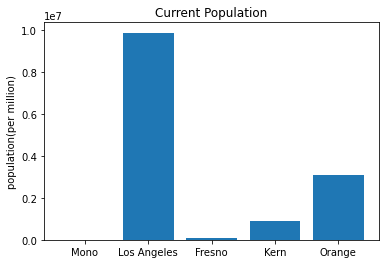

In [32]:
#I want to include the population of each county involved to compare and contrast to the mercury levels over time.
plt.xticks(ypos,county)
plt.ylabel("population(per million)")
plt.title("Current Population")
plt.bar(ypos,population,label="Population")

In [33]:
Mono = pd.read_csv('../Water Project/Mer-Water-Lab-Data.csv')

print(Mono)

       station_id          station_name  \
0           13494         03S02E07P003M   
1           13494         03S02E07P003M   
2           13496         03S02E08F001M   
3           13496         03S02E08F001M   
4           13497         03S02E08G001M   
...           ...                   ...   
17275         384  Barker Sl. Pump Plnt   
17276         384  Barker Sl. Pump Plnt   
17277         384  Barker Sl. Pump Plnt   
17278         384  Barker Sl. Pump Plnt   
17279         384  Barker Sl. Pump Plnt   

                                       full_station_name station_number  \
0                                          03S02E07P003M  03S02E07P003M   
1                                          03S02E07P003M  03S02E07P003M   
2                                          03S02E08F001M  03S02E08F001M   
3                                          03S02E08F001M  03S02E08F001M   
4                                          03S02E08G001M  03S02E08G001M   
...                              

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0          3/5/80 11:00
5          9/7/83 11:10
10          5/8/75 0:00
15         6/3/88 12:40
20        7/12/77 14:00
              ...      
17255    10/21/20 10:00
17260      3/23/21 8:00
17265     1/19/22 12:05
17270     6/15/21 11:00
17275    10/20/20 10:30
Name: sample_date, Length: 3456, dtype: object


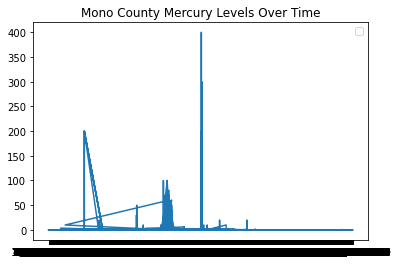

In [34]:
plt.plot(Mono.sample_date, Mono.result)
plt.title('Mono County Mercury Levels Over Time')

print(Mono.sample_date[::5])

plt.legend()

plt.show()

<AxesSubplot:xlabel='county_name'>

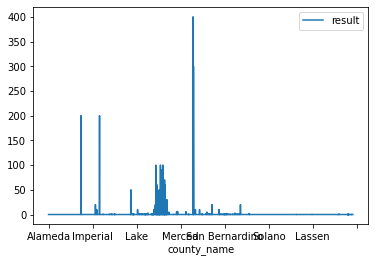

In [35]:
county_df.plot(x='county_name', y='result')

In [36]:
f = plt.figure()

<Figure size 432x288 with 0 Axes>

In [37]:
f.set_figwidth(6)

In [38]:
f.set_figheight(1)

In [39]:
print("Plot after re-sizing: ")

Plot after re-sizing: 


In [40]:
county_five = county_df[['station_id', 'county_name', 'status', 'result', 'sample_date']]

In [41]:
#I want to create a time series to visualize the mercury results data. 
import pandas as df
import numpy as np
import datetime
county_df = pd.read_csv('../Water Project/Mer-Water-Lab-Data.csv')

In [42]:
county_df.sort_values('sample_date')
#sort values by sample date. 

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
11084,5778,OTAY LO FILTRATION P,OTAY LO FILTRATION PLT BL LO OTAY,X7199010,Surface Water,32.6062,116.9320,Review Status Unknown,San Diego,WDIS_0969518,1/1/74 0:00,NaN,Feet,Total Mercury,0.00000,0.001,ug/L,UnkMod Mercury
11055,5773,MIRAMAR FILTRATION P,MIRAMAR FILTRATION PLT BL MIRAMAR,X5699010,Surface Water,32.9150,117.1028,Review Status Unknown,San Diego,WDIS_0012267,1/1/74 0:00,NaN,Feet,Total Mercury,0.00000,0.001,ug/L,UnkMod Mercury
11031,5771,ALVARADO FILTRATION,ALVARADO FILTRATION PLT BL MURRAY,X5199010,Surface Water,32.7806,117.0425,Review Status Unknown,San Diego,WDIS_0012211,1/1/74 0:00,NaN,Feet,Total Mercury,0.00000,0.001,ug/L,UnkMod Mercury
15587,1631,SACRAMENTO R A KESWI,SACRAMENTO R A KESWICK,A2101000,Surface Water,40.6010,122.4442,Review Status Unknown,Shasta,NA0107B0001,1/10/07 11:10,0.15,Meters,Total Mercury,0.00042,0.200,ug/L,EPA 1631 E (T)
15463,1128,SACRAMENTO R A BALLS,SACRAMENTO R A BALLS FERRY,A0281500,Surface Water,40.4177,122.1944,Review Status Unknown,Shasta,NA0107B0002,1/10/07 11:15,0.15,Meters,Total Mercury,0.00065,0.200,ug/L,EPA 1631 E (T)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13269,75,MAZE,San Joaquin R. @ Maze Rd. Bridge,B0704000,Surface Water,37.6399,121.2277,Review Status Unknown,Stanislaus,WDIS_0892777,9/9/87 8:30,NaN,Feet,Total Mercury,0.00000,0.001,ug/L,EPA 245.1(T)
11532,13764,03S05W20K004M,03S05W20K004M,03S05W20K004M,Groundwater,37.6556,122.4356,Review Status Unknown,San Mateo,WDIS_0201409,9/9/87 8:30,NaN,Feet,Total Mercury,0.00000,0.001,ug/L,UnkMod Mercury
11531,13763,03S05W20K003M,03S05W20K003M,03S05W20K003M,Groundwater,37.6556,122.4356,Review Status Unknown,San Mateo,WDIS_0201408,9/9/87 8:40,NaN,Feet,Total Mercury,0.00000,0.001,ug/L,UnkMod Mercury
5763,405,Pyramid TU Outlet,PYRAMID LK A ANGELES Tunnel INtake Outlet,PY001000,Surface Water,34.6449,118.7642,Review Status Unknown,Los Angeles,OM0988A0463,9/9/88 11:15,1.00,Feet,Total Mercury,0.00000,0.001,ug/L,EPA 245.1(T)


In [43]:
Dates = ["1974-01-01","1979-12-31","1980-01-01","1985-12-31","1990-01-01","1995-12-31", "1996-01-01", "2001-12-31", "2002-01-01", "2007-12-31", "2008-01-01", "2013-01-01", "2018-12-31", "2019-01-01", "2022-12-31"]

In [44]:
countybydates_df = pd.DataFrame({'InsertedDate': pd.to_datetime(Dates)})

In [45]:
countybydates_df['Year'] = countybydates_df['InsertedDate'].dt.strftime('%Y')

In [46]:
countybydates_df['Month'] = countybydates_df['InsertedDate'].dt.strftime('%m')

In [47]:
print(countybydates_df)

   InsertedDate  Year Month
0    1974-01-01  1974    01
1    1979-12-31  1979    12
2    1980-01-01  1980    01
3    1985-12-31  1985    12
4    1990-01-01  1990    01
5    1995-12-31  1995    12
6    1996-01-01  1996    01
7    2001-12-31  2001    12
8    2002-01-01  2002    01
9    2007-12-31  2007    12
10   2008-01-01  2008    01
11   2013-01-01  2013    01
12   2018-12-31  2018    12
13   2019-01-01  2019    01
14   2022-12-31  2022    12


In [48]:
countybydates_df['Year'] = countybydates_df['InsertedDate'].dt.year 

In [49]:
countybydates_df['Month'] = countybydates_df['InsertedDate'].dt.month

In [50]:
print(countybydates_df)

   InsertedDate  Year  Month
0    1974-01-01  1974      1
1    1979-12-31  1979     12
2    1980-01-01  1980      1
3    1985-12-31  1985     12
4    1990-01-01  1990      1
5    1995-12-31  1995     12
6    1996-01-01  1996      1
7    2001-12-31  2001     12
8    2002-01-01  2002      1
9    2007-12-31  2007     12
10   2008-01-01  2008      1
11   2013-01-01  2013      1
12   2018-12-31  2018     12
13   2019-01-01  2019      1
14   2022-12-31  2022     12


In [51]:
countybydates_df['year'] = pd.DatetimeIndex(countybydates_df['InsertedDate']).year

In [52]:
countybydates_df['month'] = pd.DatetimeIndex(countybydates_df['InsertedDate']).month

In [53]:
print(countybydates_df)

   InsertedDate  Year  Month  year  month
0    1974-01-01  1974      1  1974      1
1    1979-12-31  1979     12  1979     12
2    1980-01-01  1980      1  1980      1
3    1985-12-31  1985     12  1985     12
4    1990-01-01  1990      1  1990      1
5    1995-12-31  1995     12  1995     12
6    1996-01-01  1996      1  1996      1
7    2001-12-31  2001     12  2001     12
8    2002-01-01  2002      1  2002      1
9    2007-12-31  2007     12  2007     12
10   2008-01-01  2008      1  2008      1
11   2013-01-01  2013      1  2013      1
12   2018-12-31  2018     12  2018     12
13   2019-01-01  2019      1  2019      1
14   2022-12-31  2022     12  2022     12


In [54]:
countybydates_df['Month_Year'] = countybydates_df['InsertedDate'].dt.to_period('M')

In [55]:
print(countybydates_df)

   InsertedDate  Year  Month  year  month Month_Year
0    1974-01-01  1974      1  1974      1    1974-01
1    1979-12-31  1979     12  1979     12    1979-12
2    1980-01-01  1980      1  1980      1    1980-01
3    1985-12-31  1985     12  1985     12    1985-12
4    1990-01-01  1990      1  1990      1    1990-01
5    1995-12-31  1995     12  1995     12    1995-12
6    1996-01-01  1996      1  1996      1    1996-01
7    2001-12-31  2001     12  2001     12    2001-12
8    2002-01-01  2002      1  2002      1    2002-01
9    2007-12-31  2007     12  2007     12    2007-12
10   2008-01-01  2008      1  2008      1    2008-01
11   2013-01-01  2013      1  2013      1    2013-01
12   2018-12-31  2018     12  2018     12    2018-12
13   2019-01-01  2019      1  2019      1    2019-01
14   2022-12-31  2022     12  2022     12    2022-12


In [56]:
countybydates_df['Month_Year'] = countybydates_df['InsertedDate'].apply(lambda x: x.strftime('%B-%Y')) 

In [57]:
print(countybydates_df)

   InsertedDate  Year  Month  year  month     Month_Year
0    1974-01-01  1974      1  1974      1   January-1974
1    1979-12-31  1979     12  1979     12  December-1979
2    1980-01-01  1980      1  1980      1   January-1980
3    1985-12-31  1985     12  1985     12  December-1985
4    1990-01-01  1990      1  1990      1   January-1990
5    1995-12-31  1995     12  1995     12  December-1995
6    1996-01-01  1996      1  1996      1   January-1996
7    2001-12-31  2001     12  2001     12  December-2001
8    2002-01-01  2002      1  2002      1   January-2002
9    2007-12-31  2007     12  2007     12  December-2007
10   2008-01-01  2008      1  2008      1   January-2008
11   2013-01-01  2013      1  2013      1   January-2013
12   2018-12-31  2018     12  2018     12  December-2018
13   2019-01-01  2019      1  2019      1   January-2019
14   2022-12-31  2022     12  2022     12  December-2022


In [58]:
countybydates_df['yyyy-mm'] = pd.to_datetime(countybydates_df['InsertedDate']).dt.strftime('%Y-%m')

In [59]:
print(countybydates_df)

   InsertedDate  Year  Month  year  month     Month_Year  yyyy-mm
0    1974-01-01  1974      1  1974      1   January-1974  1974-01
1    1979-12-31  1979     12  1979     12  December-1979  1979-12
2    1980-01-01  1980      1  1980      1   January-1980  1980-01
3    1985-12-31  1985     12  1985     12  December-1985  1985-12
4    1990-01-01  1990      1  1990      1   January-1990  1990-01
5    1995-12-31  1995     12  1995     12  December-1995  1995-12
6    1996-01-01  1996      1  1996      1   January-1996  1996-01
7    2001-12-31  2001     12  2001     12  December-2001  2001-12
8    2002-01-01  2002      1  2002      1   January-2002  2002-01
9    2007-12-31  2007     12  2007     12  December-2007  2007-12
10   2008-01-01  2008      1  2008      1   January-2008  2008-01
11   2013-01-01  2013      1  2013      1   January-2013  2013-01
12   2018-12-31  2018     12  2018     12  December-2018  2018-12
13   2019-01-01  2019      1  2019      1   January-2019  2019-01
14   2022-

In [60]:
countybydates_df['yyyy'] = pd.to_datetime(countybydates_df['InsertedDate']).dt.strftime('%Y')

In [61]:
countybydates_df['mm'] = pd.to_datetime(countybydates_df['InsertedDate']).dt.strftime('%m')

In [62]:
print(countybydates_df)

   InsertedDate  Year  Month  year  month     Month_Year  yyyy-mm  yyyy  mm
0    1974-01-01  1974      1  1974      1   January-1974  1974-01  1974  01
1    1979-12-31  1979     12  1979     12  December-1979  1979-12  1979  12
2    1980-01-01  1980      1  1980      1   January-1980  1980-01  1980  01
3    1985-12-31  1985     12  1985     12  December-1985  1985-12  1985  12
4    1990-01-01  1990      1  1990      1   January-1990  1990-01  1990  01
5    1995-12-31  1995     12  1995     12  December-1995  1995-12  1995  12
6    1996-01-01  1996      1  1996      1   January-1996  1996-01  1996  01
7    2001-12-31  2001     12  2001     12  December-2001  2001-12  2001  12
8    2002-01-01  2002      1  2002      1   January-2002  2002-01  2002  01
9    2007-12-31  2007     12  2007     12  December-2007  2007-12  2007  12
10   2008-01-01  2008      1  2008      1   January-2008  2008-01  2008  01
11   2013-01-01  2013      1  2013      1   January-2013  2013-01  2013  01
12   2018-12

In [63]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import datetime

timestamps_df = pd.read_csv('../Water Project/Mer-Water-Lab-Data.csv')

In [64]:
#read csv with Pandas
timestamps_df = pd.read_csv('../Water Project/Mer-Water-Lab-Data.csv')
timestamps_df.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0003485,3/5/80 11:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
1,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0309048,4/22/86 13:35,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
2,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0309057,6/3/88 12:20,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
3,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0003490,7/7/80 14:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
4,13497,03S02E08G001M,03S02E08G001M,03S02E08G001M,Groundwater,37.6881,121.7767,Review Status Unknown,Alameda,WDIS_0309060,6/30/76 0:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury


In [65]:
#check the missing value and the data type of each column.
timestamps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station_id          17280 non-null  int64  
 1   station_name        17280 non-null  object 
 2   full_station_name   17280 non-null  object 
 3   station_number      17280 non-null  object 
 4   station_type        17280 non-null  object 
 5   latitude            16847 non-null  float64
 6   longitude           16847 non-null  float64
 7   status              17280 non-null  object 
 8   county_name         17280 non-null  object 
 9   sample_code         17280 non-null  object 
 10  sample_date         17280 non-null  object 
 11  sample_depth        11162 non-null  float64
 12  sample_depth_units  17280 non-null  object 
 13  parameter           17280 non-null  object 
 14  result              17275 non-null  float64
 15  reporting_limit     17279 non-null  float64
 16  unit

In [66]:
#check the number of distinct sample date codes.
timestamps_df['sample_date'].nunique()
#there are 15,191 results


15191

In [67]:
#I want to create a variety a lists that will visualize the over 15,000 results. 
list_add = list(timestamps_df['sample_date'])

In [68]:
list_add = list(timestamps_df['county_name'])

In [69]:
list_add = list(timestamps_df['station_id'])

In [70]:
list_add = list(timestamps_df['result'])

In [71]:
list_YM = [i.split(" ")[0][:-3] for i in  list(timestamps_df['sample_date'])]

In [72]:
list_Year = [i.split(" ")[0][0:4] for i in  list(timestamps_df['sample_date'])]

In [73]:
timestamps_df['YM'] = list_YM

In [74]:
timestamps_df['Year'] = list_Year

In [75]:
timestamps_df

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name,YM,Year
0,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0003485,3/5/80 11:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury,3/5,3/5/
1,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0309048,4/22/86 13:35,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury,4/22,4/22
2,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0309057,6/3/88 12:20,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury,6/3,6/3/
3,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0003490,7/7/80 14:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury,7/7,7/7/
4,13497,03S02E08G001M,03S02E08G001M,03S02E08G001M,Groundwater,37.6881,121.7767,Review Status Unknown,Alameda,WDIS_0309060,6/30/76 0:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury,6/30,6/30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1020B0054,10/20/20 10:30,1.0,Meters,Dissolved Mercury,0.0,0.200,ug/L,EPA 200.8 (Hg Dissolved),10/20,10/2
17276,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1121B0078,11/16/21 11:45,1.0,Meters,Dissolved Mercury,0.0,0.200,ug/L,EPA 200.8 (Hg Dissolved),11/16,11/1
17277,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1120B0059,11/17/20 11:30,1.0,Meters,Dissolved Mercury,0.0,0.200,ug/L,EPA 200.8 (Hg Dissolved),11/17,11/1
17278,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1221B0082,12/14/21 12:15,1.0,Meters,Dissolved Mercury,0.0,0.200,ug/L,EPA 200.8 (Hg Dissolved),12/14,12/1


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import datetime

timestamps_df = pd.read_csv('../Water Project/Mer-Water-Lab-Data.csv')

In [77]:
timestamps_df = pd.read_csv('../Water Project/Mer-Water-Lab-Data.csv')

In [78]:
timestamps_df.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0003485,3/5/80 11:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
1,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0309048,4/22/86 13:35,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
2,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0309057,6/3/88 12:20,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
3,13496,03S02E08F001M,03S02E08F001M,03S02E08F001M,Groundwater,37.6881,121.7813,Review Status Unknown,Alameda,WDIS_0003490,7/7/80 14:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury
4,13497,03S02E08G001M,03S02E08G001M,03S02E08G001M,Groundwater,37.6881,121.7767,Review Status Unknown,Alameda,WDIS_0309060,6/30/76 0:00,NaN,Feet,Total Mercury,0.0,0.001,ug/L,UnkMod Mercury


In [79]:
timestamps_df['sample_date'].str.split(' ')[0][0]

'3/5/80'

In [80]:
timestamps_df['converteddate']=pd.to_datetime(timestamps_df['sample_date'],format='%m/%d/%y %H:%M')

In [81]:
timestamps_df['converteddate'].dt.year

0        1980
1        1986
2        1988
3        1980
4        1976
         ... 
17275    2020
17276    2021
17277    2020
17278    2021
17279    2020
Name: converteddate, Length: 17280, dtype: int64

In [82]:
year_condition =[
    
    (timestamps_df['converteddate'].dt.year<1980),
    (timestamps_df['converteddate'].dt.year>=1980)&(timestamps_df['converteddate'].dt.year<1990),
    (timestamps_df['converteddate'].dt.year>=1990)&(timestamps_df['converteddate'].dt.year<2000),
    (timestamps_df['converteddate'].dt.year>=2000)&(timestamps_df['converteddate'].dt.year<2010),
    (timestamps_df['converteddate'].dt.year>=2010)&(timestamps_df['converteddate'].dt.year<2020),
    (timestamps_df['converteddate'].dt.year>=2020)
]

decades=[1970, 1980, 1990, 2000, 2010, 2020]

In [83]:
dataframe_2012=timestamps_df.loc[timestamps_df['converteddate'].dt.year >2012]

In [84]:
dataframe_2012

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name,converteddate
39,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0116B0008,1/19/16 10:50,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved),2016-01-19 10:50:00
42,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0216B0018,2/16/16 10:40,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved),2016-02-16 10:40:00
46,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0219B0018,2/19/19 13:05,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved),2019-02-19 13:05:00
54,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0419B0036,4/15/19 12:10,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved),2019-04-15 12:10:00
55,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0417B0031,4/17/17 11:05,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved),2017-04-17 11:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1020B0054,10/20/20 10:30,1.0,Meters,Dissolved Mercury,0.0,0.2000,ug/L,EPA 200.8 (Hg Dissolved),2020-10-20 10:30:00
17276,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1121B0078,11/16/21 11:45,1.0,Meters,Dissolved Mercury,0.0,0.2000,ug/L,EPA 200.8 (Hg Dissolved),2021-11-16 11:45:00
17277,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1120B0059,11/17/20 11:30,1.0,Meters,Dissolved Mercury,0.0,0.2000,ug/L,EPA 200.8 (Hg Dissolved),2020-11-17 11:30:00
17278,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1221B0082,12/14/21 12:15,1.0,Meters,Dissolved Mercury,0.0,0.2000,ug/L,EPA 200.8 (Hg Dissolved),2021-12-14 12:15:00


In [85]:
dataframe_2012.insert

<bound method DataFrame.insert of        station_id          station_name  \
39            259         Del Valle COW   
42            259         Del Valle COW   
46            259         Del Valle COW   
54            259         Del Valle COW   
55            259         Del Valle COW   
...           ...                   ...   
17275         384  Barker Sl. Pump Plnt   
17276         384  Barker Sl. Pump Plnt   
17277         384  Barker Sl. Pump Plnt   
17278         384  Barker Sl. Pump Plnt   
17279         384  Barker Sl. Pump Plnt   

                                       full_station_name station_number  \
39                       Del Valle Conserv. Outlet Works       DV000000   
42                       Del Valle Conserv. Outlet Works       DV000000   
46                       Del Valle Conserv. Outlet Works       DV000000   
54                       Del Valle Conserv. Outlet Works       DV000000   
55                       Del Valle Conserv. Outlet Works       DV000000   

In [86]:
dataframe_2012.groupby('converteddate')['result'].count()

converteddate
2013-01-09 08:55:00    1
2013-01-15 12:50:00    1
2013-01-15 14:30:00    1
2013-01-15 14:55:00    1
2013-01-16 09:00:00    1
                      ..
2066-06-24 00:00:00    1
2066-07-11 00:00:00    1
2066-07-15 00:00:00    1
2067-06-08 00:00:00    6
2067-07-06 00:00:00    1
Name: result, Length: 2880, dtype: int64

In [87]:
dataframe_2012.groupby('county_name')['converteddate'].count()

county_name
Alameda            248
Butte              307
Colusa              16
Contra Costa       113
Del Norte            8
Fresno               3
Glenn                8
Humboldt            39
Kern               225
Kings               93
Lake               138
Lassen              15
Los Angeles        109
Mendocino           13
Merced             380
Modoc               63
Mono                19
Napa                15
Plumas             126
Riverside           51
Sacramento          31
San Benito           1
San Bernardino     232
San Joaquin          1
San Luis Obispo      1
Santa Clara          2
Shasta             158
Siskiyou            17
Solano             328
Sutter              79
Tehama             153
Trinity              5
Yolo               527
Yuba                12
Name: converteddate, dtype: int64

In [88]:
dataframe_2012

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name,converteddate
39,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0116B0008,1/19/16 10:50,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved),2016-01-19 10:50:00
42,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0216B0018,2/16/16 10:40,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved),2016-02-16 10:40:00
46,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0219B0018,2/19/19 13:05,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved),2019-02-19 13:05:00
54,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0419B0036,4/15/19 12:10,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved),2019-04-15 12:10:00
55,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0417B0031,4/17/17 11:05,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved),2017-04-17 11:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1020B0054,10/20/20 10:30,1.0,Meters,Dissolved Mercury,0.0,0.2000,ug/L,EPA 200.8 (Hg Dissolved),2020-10-20 10:30:00
17276,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1121B0078,11/16/21 11:45,1.0,Meters,Dissolved Mercury,0.0,0.2000,ug/L,EPA 200.8 (Hg Dissolved),2021-11-16 11:45:00
17277,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1120B0059,11/17/20 11:30,1.0,Meters,Dissolved Mercury,0.0,0.2000,ug/L,EPA 200.8 (Hg Dissolved),2020-11-17 11:30:00
17278,384,Barker Sl. Pump Plnt,North Bay Aqueduct at Barker Slough Pumping Plant,KG000000,Surface Water,38.2759,121.7965,Review Status Unknown,Solano,D1221B0082,12/14/21 12:15,1.0,Meters,Dissolved Mercury,0.0,0.2000,ug/L,EPA 200.8 (Hg Dissolved),2021-12-14 12:15:00


In [89]:
dataframe_2012.pivot_table('converteddate',['county_name','result']).head(60)

converteddate
county_name  result                                
Alameda      0.0000   2017-05-06 03:36:05.806451456
Butte        0.0000   2018-06-21 21:56:51.136363520
             0.0005   2014-08-09 14:30:00.000000000
             0.0006   2014-07-25 19:02:51.428571392
             0.0007   2014-05-10 21:07:30.000000000
             0.0008   2014-12-09 09:01:40.000000000
             0.0009   2013-09-21 08:27:30.000000000
             0.0011   2014-07-09 01:25:00.000000000
             0.0012   2015-05-06 11:00:00.000000000
             0.0013   2015-03-02 03:35:00.000000000
             0.0014   2014-08-09 10:05:00.000000000
             0.0016   2014-05-07 09:50:00.000000000
             0.0018   2014-08-06 09:30:00.000000000
             0.0019   2015-02-04 09:55:00.000000000
             0.0021   2013-02-07 10:15:00.000000000
             0.0025   2014-05-06 08:30:00.000000000
             0.0034   2016-02-09 10:25:00.000000000
             0.0035   2016-02-03 12:10:00.000000000
             0.0039   2013-11-06 10:15:00.000000000
             0.0044   2015-08-11 10:20:00.000000000
             0.0291   2015-02-10 09:30:00.000000000
Colusa       0.0008   2013-11-06 09:10:00.000000000
             0.0009   2015-11-10 09:00:00.000000000
             0.0010   2014-02-05 09:30:00.000000000
             0.0011   2013-08-07 08:10:00.000000000
             0.0014   2015-08-05 09:10:00.000000000
             0.0021   2013-05-08 08:25:00.000000000
             0.0023   2014-03-23 09:00:00.000000000
             0.0025   2014-05-07 08:00:00.000000000
             0.0027   2013-08-21 13:15:00.000000000
             0.0038   2016-05-16 09:00:00.000000000
             0.0041   2016-02-09 09:20:00.000000000
             0.0049   2015-02-04 09:00:00.000000000
             0.0255   2014-03-26 12:45:00.000000000
             0.0262   2013-02-27 13:15:00.000000000
             0.0425   2015-03-25 16:10:00.000000000
Contra Costa 0.0000   2020-03-10 21:13:08.495575040
Del Norte    0.0000   2013-02-26 08:05:00.000000000
             0.0006   2013-05-24 20:17:30.000000000
             0.0009   2013-08-20 08:30:00.000000000
             0.0012   2014-03-25 08:15:00.000000000
             0.0019   2014-03-25 07:05:00.000000000
             0.0031   2015-03-24 09:30:00.000000000
             0.0053   2015-03-24 08:00:00.000000000
Fresno       200.0000 2067-06-17 08:00:00.000000000
Glenn        0.0000   2014-11-25 00:00:00.000000000
             0.0037   2013-02-06 08:35:00.000000000
             0.0090   2016-02-03 11:05:00.000000000
             0.0177   2015-02-10 09:00:00.000000000
Humboldt     0.0000   2026-08-26 13:06:15.000000000
             0.0005   2013-08-19 11:15:00.000000000
             0.0006   2013-06-22 21:13:20.000000000
             0.0007   2013-09-27 09:34:10.000000000
             0.0008   2014-06-07 12:07:30.000000000
             0.0009   2014-11-22 06:50:00.000000000
             0.0010   2015-03-23 14:20:00.000000000
             0.0011   2014-03-24 12:00:00.000000000
             0.0012   2013-05-25 00:15:00.000000000
             0.0013   2014-03-15 22:28:20.000000000
             0.0016   2013-09-10 00:37:30.000000000

In [90]:
pd.pivot_table(dataframe_2012,index=['converteddate','result']).head()

,,latitude,longitude,reporting_limit,sample_depth,station_id
converteddate,result,,,,,
2013-01-09 08:55:00,0.0,39.4556,121.6369,0.0002,0.3,422.0
2013-01-15 12:50:00,0.0,37.6547,121.7419,0.0002,1.0,373.0
2013-01-15 14:30:00,0.0,37.0681,121.0854,0.0002,3.0,412.0
2013-01-15 14:55:00,0.0,37.8298,121.5574,0.0002,1.0,10.0
2013-01-16 09:00:00,0.0,34.8340,118.7119,0.0002,0.3,352.0


In [2]:
pd.pivot_table(dataframe_2012,index=['county_name','result'],values=['converteddate']).head(100)

NameError: name 'pd' is not defined

In [92]:
dataframe_2012.loc[dataframe_2012['Alameda'] == county_name]

KeyError: 'Alameda'

In [1]:
print(dataframe_2012)

NameError: name 'dataframe_2012' is not defined

In [ ]:
dataframe_2012['converteddate'] = dataframe_2012['result']*.05

In [ ]:
dataframe_2012['county_name'].plot()